<a href="https://colab.research.google.com/github/RishabBha0428/loadsmart-notebooks/blob/main/metric_clustering_matrix_factorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv(
    '/content/drive/MyDrive/DC Loadsmart Team/UpdatedLoadsmartData.gz',
    compression="gzip",
    header=0,  # names are inferred from the first line of the file
    escapechar="\\",
)

In [ ]:
df.columns

Index(['quote_date', 'quote_id', 'quote_channel', 'intyegration', 'is_booked',
       'shipper_id', 'shipper_size', 'quote_manual_overwrite', 'pu_zip3',
       'del_zip3', 'pu_kma', 'del_kma', 'kma_lane', 'pu_state', 'del_state',
       'miles', 'equip_type', 'ecoh_algorithm_price', 'book_date',
       'delivery_date', 'quote_price', 'original_pickup_at_quote',
       'final_pickup', 'commodity', 'source_date', 'sourced_price',
       'sourcing_methd', 'sourcing_channel', 'carrier_id', 'carrier_state',
       'carrier_city', 'carrier_regiom', 'carrier_fleet_size',
       'carrier_number_drivers'],
      dtype='object')

In [ ]:
new_df = df[['source_date', 'book_date', 'original_pickup_at_quote', 'miles', "quote_price", 'quote_date', 'final_pickup', 'sourced_price', 'del_state', 'pu_state', 'sourcing_channel']].dropna()
new_df

,source_date,book_date,original_pickup_at_quote,miles,quote_price,quote_date,final_pickup,sourced_price,del_state,pu_state,sourcing_channel
2,2020-01-06 11:57:31,2020-01-06 13:59:50.809,2020-01-08 15:00:00,113.200,662.85,2020-01-06 08:32:20.468,2020-01-08 15:00:00,550.0,PA,PA,alice
3,2020-01-07 10:39:03.818,2020-01-06 14:33:56.431,2020-01-09 07:01:00,645.000,1855.62,2020-01-06 09:05:35.432,2020-01-09 00:00:00,1350.0,ND,CO,alice
6,2020-01-06 16:56:00,2020-01-06 20:47:57.755,2020-01-07 15:00:00,1891.200,3598.60,2020-01-06 15:47:01.405,2020-01-07 15:00:00,3200.0,AZ,OH,alice
7,2020-01-07 16:52:00,2020-01-07 14:48:41.417,2020-01-18 15:00:00,400.300,823.04,2020-01-07 09:47:36.689,2020-01-18 22:00:00,450.0,CA,AZ,alice
9,2020-01-10 09:36:00,2020-01-08 13:32:43.236,2020-01-09 13:00:00,1183.500,1685.00,2020-01-08 08:28:44.565,2020-01-10 21:00:00,1800.0,OK,NC,alice
...,...,...,...,...,...,...,...,...,...,...,...
175155,2022-09-19 15:28:09.626,2022-09-19 17:10:13.51,2022-09-19 23:07:39.171,589.600,937.88,2022-09-19 13:07:39.183,2022-09-19 15:00:00,935.0,CA,OR,alice
175159,2022-09-20 10:40:56.864,2022-09-20 13:55:07.171,2022-09-21 21:00:00,2371.800,7239.73,2022-09-20 09:53:58.037,2022-09-21 21:00:00,6000.0,OR,MI,alice
175160,2022-09-20 10:29:43.891,2022-09-20 14:26:48.01,2022-09-20 14:00:00,1440.100,2970.02,2022-09-20 10:26:21.076,2022-09-20 14:00:00,2300.0,TX,NC,alice
175161,2022-09-21 08:07:18.802,2022-09-20 16:18:16.819,2022-09-21 12:00:00,321.242,994.96,2022-09-20 12:10:32.084,2022-09-21 12:00:00,850.0,KY,NC,alice


In [ ]:
new_df["final_pickup"] = pd.to_datetime(new_df['final_pickup'], format='%Y-%m-%d %H:%M:%S')
new_df["quote_date"] = pd.to_datetime(new_df['quote_date'], format='%Y-%m-%d %H:%M:%S')
new_df["book_date"] = pd.to_datetime(new_df['book_date'], format='%Y-%m-%d %H:%M:%S')
new_df["original_pickup_at_quote"] = pd.to_datetime(new_df['original_pickup_at_quote'], format='%Y-%m-%d %H:%M:%S')

### compute metric

In [ ]:
delta1 = (new_df.final_pickup - new_df.book_date).dt.days
delta2 = (new_df.final_pickup - new_df.original_pickup_at_quote).dt.days
temp = pd.DataFrame(data={"delta1" : delta1, "delta2" : delta2})
temp

,delta1,delta2
2,2,0
3,2,-1
6,0,0
7,11,0
9,2,1
...,...,...
175155,-1,-1
175159,1,0
175160,-1,0
175161,0,0


In [ ]:
TERM1 = np.max(temp, axis=1)
TERM2 = ((new_df['quote_price'] - new_df['sourced_price']) / new_df['sourced_price'])


def normalize(ren):
    """we clip and normalize"""
    a, b = np.percentile(ren, 2.5), np.percentile(ren, 97.5)
    print(f"Clipped between {a, b}")
    ren = np.clip(a=ren, a_min=a, a_max=b)
    return (ren - ren.min()) / (ren.max() - ren.min())

y = 1/3*normalize(TERM1) + 1/3*normalize(TERM2)
y = 10*np.array(y)

Clipped between (0.0, 17.0)
Clipped between (-0.18915099999999996, 0.5872)


In [ ]:
#new metric


In [ ]:
y

array([2.08526053, 2.8123866 , 1.34695733, ..., 2.06291589, 1.54437094,
       0.88862011])

#Clustering

miles, quote_price, delta_date (original_pickup_at_quote - quote_date), interstate vs intrastate, time of day


In [ ]:
new_df['delta_date'] = (new_df['original_pickup_at_quote'] - new_df['quote_date']).dt.components['hours']
new_df['time_of_day'] = new_df['original_pickup_at_quote'].apply(lambda x: x.hour)
new_df['interstate'] = new_df['del_state'] == new_df['pu_state']

In [ ]:
# df_metrics = new_df[['miles', 'quote_price', 'original_pickup_at_quote', 'quote_date', 'pu_state', 'del_state']]
# df_metrics["quote_date"] = pd.to_datetime(df['quote_date'], format='%Y-%m-%d %H:%M:%S')
# df_metrics

df_metrics = new_df[['miles', 'quote_price', 'delta_date', 'interstate', 'time_of_day']]

In [ ]:
# df_metrics['delta_date'] = (df_metrics['original_pickup_at_quote'] - df_metrics['quote_date']).dt.components['hours']
# df_metrics['in_state'] = (df_metrics['pu_state']==df_metrics['del_state']).astype('int')

In [ ]:
# df_metrics['pickup_hour'] = df_metrics['original_pickup_at_quote'].apply(lambda x: x.hour)
#df_metrics['time_period_of_day'] = df_metrics['pickup_hour']

In [ ]:
df_metrics.head()

,miles,quote_price,delta_date,interstate,time_of_day
2,113.2,662.85,6,True,15
3,645.0,1855.62,21,False,7
6,1891.2,3598.60,23,False,15
7,400.3,823.04,5,False,15
9,1183.5,1685.00,4,False,13


In [ ]:
# X = df_metrics.drop(['original_pickup_at_quote', 'quote_date', 'pu_state', 'del_state'],1)
# X.head()

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0, 10))
# scaler.fit(X)
# X_df = scaler.transform(X)


In [ ]:
# sum_of_squared_distances = []
# K = range(1,15)
# for k in K:
#     km = KMeans(n_clusters=k)
#     km = km.fit(X_df)
#     sum_of_squared_distances.append(km.inertia_)

In [ ]:
# plt.plot(K, sum_of_squared_distances, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Sum_of_squared_distances')
# plt.title('Elbow Method For Optimal k')
# plt.show()

In [ ]:
kmeans3 = KMeans(n_clusters = 10)
kmeans3.fit(df_metrics)


KMeans(n_clusters=10)

In [ ]:
f_kmeans = kmeans3.fit_predict(df_metrics)

In [ ]:
kmeans3.labels_

array([0, 2, 6, ..., 9, 0, 0], dtype=int32)

In [ ]:
df_metrics['cluster'] = kmeans3.labels_
df_metrics['sourcing_channel'] = new_df['sourcing_channel']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_metrics['metric'] = y
df_metrics.groupby('cluster').mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,miles,quote_price,delta_date,interstate,time_of_day,metric
cluster,,,,,,
0,193.847342,812.944445,11.191754,0.488134,11.627452,2.188584
1,1588.591455,4888.221282,10.473583,0.000340,12.883333,2.452340
2,597.825057,2113.750038,10.789603,0.040267,11.932673,2.409331
3,2308.177703,8443.066805,9.381538,0.000513,13.910769,2.645821
4,692.000000,254491.280000,5.000000,0.000000,16.000000,3.725490
5,380.494548,1414.624181,11.309241,0.139029,11.419687,2.336753
6,1154.555273,3802.700644,10.514708,0.002882,12.398004,2.458626
7,1965.002797,6376.256376,10.299701,0.000691,12.852799,2.562782
8,2400.171773,12632.271836,10.000000,0.004831,12.792271,3.382874


In [ ]:
df_metrics['sourcing_channel'].value_counts()
#top 8 channels
#alice, loadsmart.com, mobile-app, dat, truckstop, cloudtrucks, amazon_freight_spot, newtrul


alice                  76831
loadsmart.com          53632
mobile-app              4549
dat                     1959
truckstop               1545
cloudtrucks              367
amazon_freight_spot      265
newtrul                  174
shopkeeper                85
keeptruckin               66
haulistix                 33
smarthop                  30
amazon_freight            28
amazon_automatic          14
truckerpath               10
kamion                     6
truck_matching             5
spotter                    4
bridgehaul                 3
channel19                  1
liveloads                  1
truck-matching             1
aifleet                    1
Name: sourcing_channel, dtype: int64

In [ ]:
#encode channel

df_metrics['sourcing_channel_num'] = df_metrics['sourcing_channel'].map({'alice': 1, 'loadsmart.com': 2, 'mobile-app': 3, 'dat': 4, 'truckstop': 5, 'cloudtrucks': 6, "amazon_freight_spot": 7, 'newtrul':8, 'shopkeeper': 9, 'keeptruckin':10, 'haulistix': 11, 'smarthop': 12, 'amazon_freight': 13, 'amazon_automatic ': 14,'truckerpath': 15, 'kamion': 16, 'truck_matching ': 17, 'spotter': 18, 'bridgehaul': 19, 'channel19': 20,'liveloads': 21, 'truck-matching':22, 'aifleet':23})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#loc[df['col1'].isin([value1, value2, value3, ...])]
df_metrics = df_metrics[df_metrics['sourcing_channel_num'].isin([1, 2, 3, 4, 5, 6, 7, 8])]
df_metrics['sourcing_channel_num'].value_counts()

1.0    76831
2.0    53632
3.0     4549
4.0     1959
5.0     1545
6.0      367
7.0      265
8.0      174
Name: sourcing_channel_num, dtype: int64

In [ ]:
df_metrics

,miles,quote_price,delta_date,interstate,time_of_day,cluster,sourcing_channel,metric,sourcing_channel_num
2,113.200,662.85,6,True,15,0,alice,2.085261,1.0
3,645.000,1855.62,21,False,7,2,alice,2.812387,1.0
6,1891.200,3598.60,23,False,15,6,alice,1.346957,1.0
7,400.300,823.04,5,False,15,0,alice,5.490196,1.0
9,1183.500,1685.00,4,False,13,2,alice,0.929981,1.0
...,...,...,...,...,...,...,...,...,...
175155,589.600,937.88,9,False,23,0,alice,0.825362,1.0
175159,2371.800,7239.73,11,False,21,7,alice,1.895364,1.0
175160,1440.100,2970.02,3,False,14,9,alice,2.062916,1.0
175161,321.242,994.96,23,False,12,0,alice,1.544371,1.0


In [ ]:
orig_matrix = pd.pivot_table(df_metrics, index = 'cluster', columns = 'sourcing_channel_num', values='metric')
orig_matrix

sourcing_channel_num,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
cluster,,,,,,,,
0,2.117483,2.290202,2.236718,2.149259,2.418516,2.421610,2.999283,2.888719
1,2.427050,2.471607,2.510187,2.496909,2.678633,2.729861,3.295823,2.383241
2,2.366346,2.453467,2.403068,2.452886,2.643810,2.640311,2.812518,2.791934
3,2.714235,2.519966,2.349359,2.818831,2.889696,2.060207,NaN,NaN
4,NaN,3.725490,NaN,NaN,NaN,NaN,NaN,NaN
5,2.277501,2.394666,2.380280,2.380168,2.552157,2.617196,2.972329,2.330845
6,2.415720,2.488379,2.693812,2.547991,2.685957,2.525104,2.639741,2.426390
7,2.541481,2.580908,2.516438,2.790983,2.828636,2.897785,NaN,2.941713
8,3.586708,2.791977,2.808886,NaN,3.445990,NaN,NaN,NaN


# Matrix Factorization Task



In [ ]:
import tensorflow.compat.v1 as tf
import seaborn as sns
import numpy as np
import pandas as pd
import collections
tf.disable_v2_behavior()
tf.logging.set_verbosity(tf.logging.ERROR)

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
def build_rating_sparse_tensor(ratings_df):
  indices = ratings_df[['cluster', 'sourcing_channel_num']].values
  values = ratings_df['metric'].values
  return tf.SparseTensor(
      indices=indices,
      values=values,
      dense_shape=[df_metrics.shape[0], len(df_metrics['sourcing_channel_num'].unique())])

In [ ]:
def sparse_mean_square_error(sparse_ratings, load_embeddings, channel_embeddings):
  predictions = tf.gather_nd(
      tf.matmul(load_embeddings, channel_embeddings, transpose_b=True),
      sparse_ratings.indices)
  loss = tf.losses.mean_squared_error(sparse_ratings.values, predictions)
  return loss

In [ ]:
class CFModel(object):
  """Simple class that represents a collaborative filtering model"""
  def __init__(self, embedding_vars, loss, metrics=None):
    """Initializes a CFModel.
    Args:
      embedding_vars: A dictionary of tf.Variables.
      loss: A float Tensor. The loss to optimize.
      metrics: optional list of dictionaries of Tensors. The metrics in each
        dictionary will be plotted in a separate figure during training.
    """
    self._embedding_vars = embedding_vars
    self._loss = loss
    self._metrics = metrics
    self._embeddings = {k: None for k in embedding_vars}
    self._session = None

  @property
  def embeddings(self):
    """The embeddings dictionary."""
    return self._embeddings

  def train(self, num_iterations=100, learning_rate=1.0, plot_results=True,
            optimizer=tf.train.GradientDescentOptimizer):
    """Trains the model.
    Args:
      iterations: number of iterations to run.
      learning_rate: optimizer learning rate.
      plot_results: whether to plot the results at the end of training.
      optimizer: the optimizer to use. Default to GradientDescentOptimizer.
    Returns:
      The metrics dictionary evaluated at the last iteration.
    """
    with self._loss.graph.as_default():
      opt = optimizer(learning_rate)
      train_op = opt.minimize(self._loss)
      local_init_op = tf.group(
          tf.variables_initializer(opt.variables()),
          tf.local_variables_initializer())
      if self._session is None:
        self._session = tf.Session()
        with self._session.as_default():
          self._session.run(tf.global_variables_initializer())
          self._session.run(tf.tables_initializer())
          tf.train.start_queue_runners()

    with self._session.as_default():
      local_init_op.run()
      iterations = []
      metrics = self._metrics or ({},)
      metrics_vals = [collections.defaultdict(list) for _ in self._metrics]

      # Train and append results.
      for i in range(num_iterations + 1):
        _, results = self._session.run((train_op, metrics))
        if (i % 10 == 0) or i == num_iterations:
          print("\r iteration %d: " % i + ", ".join(
                ["%s=%f" % (k, v) for r in results for k, v in r.items()]),
                end='')
          iterations.append(i)
          for metric_val, result in zip(metrics_vals, results):
            for k, v in result.items():
              metric_val[k].append(v)

      for k, v in self._embedding_vars.items():
        self._embeddings[k] = v.eval()

      if plot_results:
        # Plot the metrics.
        num_subplots = len(metrics)+1
        fig = plt.figure()
        fig.set_size_inches(num_subplots*10, 8)
        for i, metric_vals in enumerate(metrics_vals):
          ax = fig.add_subplot(1, num_subplots, i+1)
          for k, v in metric_vals.items():
            ax.plot(iterations, v, label=k)
          ax.set_xlim([1, num_iterations])
          ax.legend()
      return results

In [ ]:
def split_dataframe(df, holdout_fraction=0.1):
  """Splits a DataFrame into training and test sets.
  Args:
    df: a dataframe.
    holdout_fraction: fraction of dataframe rows to use in the test set.
  Returns:
    train: dataframe for training
    test: dataframe for testing
  """
  test = df.sample(frac=holdout_fraction, replace=False)
  train = df[~df.index.isin(test.index)]
  return train, test

In [ ]:
def build_model(ratings, embedding_dim=3, init_stddev=1.):
    # Split the ratings DataFrame into train and test.
    train_ratings, test_ratings = split_dataframe(ratings)
    # SparseTensor representation of the train and test datasets.
    A_train = build_rating_sparse_tensor(train_ratings)
    A_test = build_rating_sparse_tensor(test_ratings)
    # Initialize the embeddings using a normal distribution.
    U = tf.Variable(tf.random_normal(
      [A_train.dense_shape[0], embedding_dim], stddev=init_stddev))
    print(U)
    V = tf.Variable(tf.random_normal(
      [A_train.dense_shape[1], embedding_dim], stddev=init_stddev))
    train_loss = sparse_mean_square_error(A_train, U, V)
    print(train_loss)
    test_loss = sparse_mean_square_error(A_test, U, V)
    metrics = {
      'train_error': train_loss,
      'test_error': test_loss
    }
    embeddings = {
      "load_id": U,
      "channel_id": V
    }
    return CFModel(embeddings, train_loss, [metrics])

In [ ]:
#We can adjust embedding_dim parameter as needed to improve the factorization
model = build_model(df_metrics, embedding_dim=10, init_stddev=0.5)

<tf.Variable 'Variable:0' shape=(139322, 10) dtype=float32_ref>
Tensor("mean_squared_error/value:0", shape=(), dtype=float32)


 iteration 300: train_error=0.976365, test_error=0.964736

[{'train_error': 0.9763648, 'test_error': 0.9647358}]

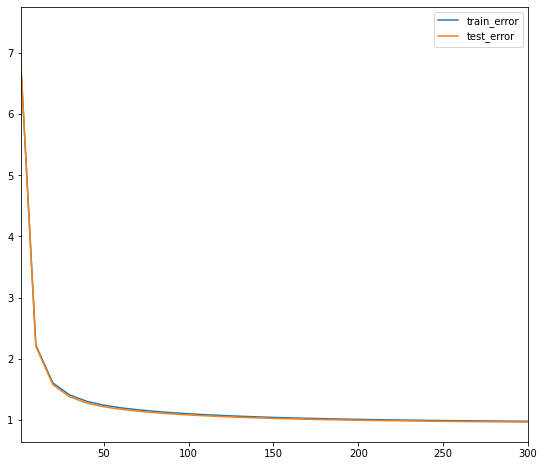

In [ ]:
model.train(num_iterations=300, learning_rate=.1)


In [ ]:
embeddings = model.embeddings
embeddings

{'load_id': array([[-1.2137507 ,  0.50526416, -0.29734638, ..., -0.14696968,
          0.43584892, -0.5435351 ],
        [-1.1026739 ,  0.6385401 , -0.27766696, ..., -0.20837785,
         -0.99074423, -0.24984889],
        [-1.0820162 ,  0.08133576,  0.9821444 , ..., -0.4182751 ,
         -0.50966597, -0.73339933],
        ...,
        [ 1.066123  , -0.20237246, -0.48784626, ..., -0.4082847 ,
         -0.6531894 , -0.14738849],
        [-1.0933663 ,  0.03722316, -0.37880066, ..., -0.28959826,
          0.54296815, -0.6360122 ],
        [ 0.20572652, -0.07651367,  0.44236735, ...,  0.21777163,
          0.0113245 , -0.39292523]], dtype=float32),
 'channel_id': array([[ 5.7697910e-01,  4.7147044e-04,  7.1703330e-02, -4.1051626e-01,
         -1.5396129e-01,  6.6340488e-01, -1.1457152e+00,  7.0021677e-01,
          5.3716415e-01, -6.3089681e-01],
        [-9.8445255e-01,  1.0060869e+00,  4.4525540e-01,  4.8491287e-01,
          2.9385984e-01,  4.3198738e-01, -2.7237982e-01,  5.6234944e-01,

In [ ]:
print("Matrix has been decomposed as M = UV where it is now the product of two matrices U and V")
print("These matrices contain latent features")
print("Dimension of U: " + str(embeddings['load_id'].shape))
print("Dimension of V: " + str(embeddings['channel_id'].shape))

Matrix has been decomposed as M = UV where it is now the product of two matrices U and V
These matrices contain latent features
Dimension of U: (139322, 10)
Dimension of V: (8, 10)


In [ ]:
#forming new result matrix
DOT = 'dot'
COSINE = 'cosine'
def compute_scores(query_embedding, item_embeddings, measure=DOT):
  """Computes the scores of the candidates given a query.
  Args:
    query_embedding: a vector of shape [k], representing the query embedding.
    item_embeddings: a matrix of shape [N, k], such that row i is the embedding
      of item i.
    measure: a string specifying the similarity measure to be used. Can be
      either DOT or COSINE.
  Returns:
    scores: a vector of shape [N], such that scores[i] is the score of item i.
  """
  u = query_embedding
  V = item_embeddings
  if measure == COSINE:
    V = V / np.linalg.norm(V, axis=1, keepdims=True)
    u = u / np.linalg.norm(u)
  scores = u.dot(V.T)
  return scores

In [ ]:
filled_matrix = compute_scores(embeddings['load_id'], embeddings['channel_id'])
#verify that this process has produced a metric of the same shape
filled_matrix.shape

(139322, 8)

In [ ]:
filled_matrix_df = pd.DataFrame(filled_matrix)

In [ ]:
filled_matrix_df

,0,1,2,3,4,5,6,7
0,0.002567,2.121111,2.302325,2.201652,2.239961,1.053082,0.131913,0.906873
1,-0.889459,2.428143,2.486348,2.238398,1.846596,2.132392,-0.913837,0.353819
2,-0.135328,2.359138,2.449106,2.638477,2.158031,2.211440,0.559425,-0.896540
3,2.204329,2.832492,1.958902,1.008092,4.259881,1.300037,-0.172507,3.359251
4,1.242043,-0.174245,0.192104,-0.549496,0.221970,-0.255544,0.902989,0.507437
...,...,...,...,...,...,...,...,...
139317,0.572377,0.363470,0.081800,-0.045807,1.016407,0.325476,-0.008189,-0.150835
139318,1.781671,0.306165,-0.519853,-1.064689,-0.027721,-0.252619,-0.317668,1.201519
139319,-0.241945,-1.663683,-1.672977,-1.896150,-0.274750,-0.679044,-0.545783,-0.355417
139320,-1.091397,0.994962,1.539982,1.788692,-0.247262,-0.039792,-0.245623,-0.470496
